In [1]:
import warnings

# 忽略警告
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import numpy as np
dtype = {
    "与学校距离": "int8",
    "交通便利程度": "int8",
    "附近商场": "int8",
    "附近医院": "int8",
    "附近便利店": "int8",
    "是否旁边需要地铁": "int8",
    "是否旁边需要公交车": "int8",
    "周围环境安静程度": "int8",
    "户型重视度": "int8",
    "所处楼层重视度": "int8",
    "房间面积重视度": "int8",
    "房间朝向重视度": "int8",
    "房屋装修重视度": "int8",
    "空调是否必要": "int8",
    "热水器是否必要": "int8",
    "暖气是否必要": "int8",
    "床是否必要": "int8",
    "网络是否必要": "int8",
    "租金价格重视度": "int8",
    "押金价格重视度": "int8",
    "房源真实程度重视度": "int8"
}

survey = pd.read_csv("./input/survey_data.csv",
                     encoding="utf-8", dtype=dtype)
SimHei = FontProperties(fname="./input/simhei.ttf")
plt.style.use('ggplot')

In [3]:
numerical_columns = ['与学校距离', '交通便利程度', '附近商场', '附近医院', '附近便利店', '是否旁边需要地铁', '是否旁边需要公交车',
                     '周围环境安静程度', '户型重视度', '所处楼层重视度', '房间面积重视度', '房间朝向重视度', '房屋装修重视度',
                     '空调是否必要', '热水器是否必要', '暖气是否必要', '床是否必要', '网络是否必要', '租金价格重视度', '押金价格重视度', '房源真实程度重视度']
stats = survey[numerical_columns].describe().loc[['mean', 'std']].round(2)
stats.to_csv("./output/问卷-数字统计指标.csv", encoding="utf-8")

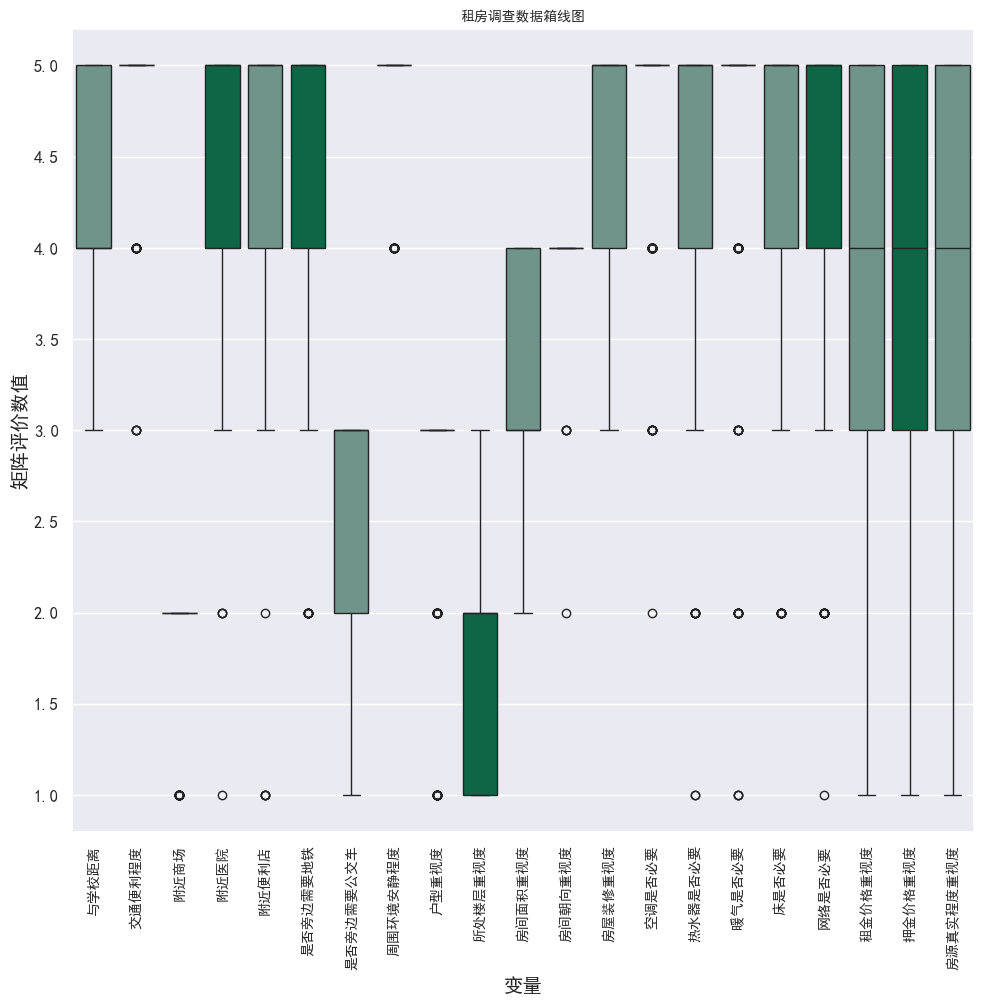

In [4]:
# 设置颜色主题
my_palette = ["#6A9A8B", "#00754B"]

# 设置画布风格
sns.set_theme(palette=my_palette)

# 创建箱线图
plt.figure(figsize=(10, 10))
sns.boxplot(data=survey, palette=my_palette)
plt.xticks(rotation=90, ha='center', va='top', fontproperties=SimHei, fontsize=10)
plt.yticks(fontproperties=SimHei, fontsize=12)
plt.xlabel('变量', fontproperties=SimHei, fontsize=14)
plt.ylabel('矩阵评价数值', fontproperties=SimHei, fontsize=14)

plt.tight_layout()
plt.savefig('./output/问卷-租房调查数据箱线图.png', dpi=600)
plt.title('租房调查数据箱线图', fontproperties=SimHei)
# 显示图形
plt.show()

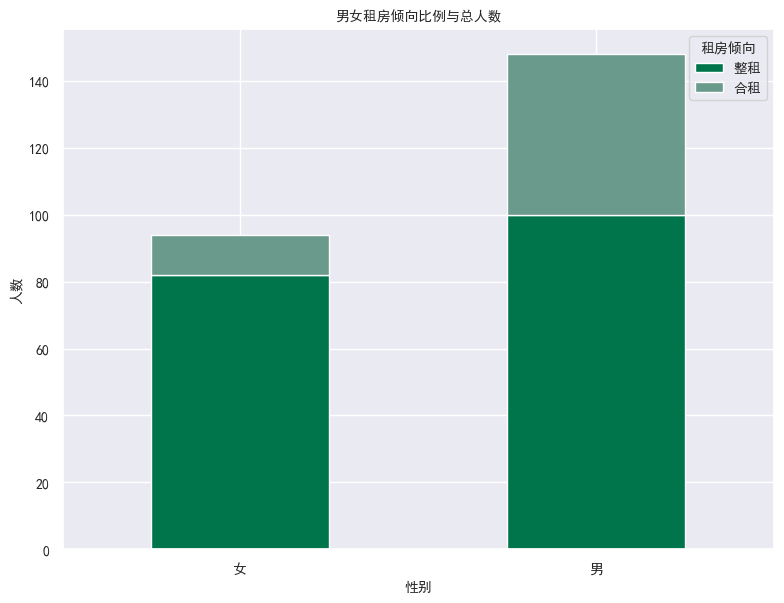

In [5]:
grouped = survey.groupby(['性别', '租房倾向']).size().unstack(fill_value=0)
grouped = grouped[['整租', '合租']]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
grouped.plot(kind='bar', stacked=True, ax=ax, color=[
             '#00754B', '#6A9A8B'])

ax.set_xlabel('性别', fontproperties=SimHei)
ax.set_ylabel('人数', fontproperties=SimHei)
ax.legend(['整租', '合租'], title='租房倾向', prop=SimHei, title_fontproperties=SimHei)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(SimHei)

plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("./output/问卷-男女租房倾向比例与总人数.png", dpi=600)
ax.set_title('男女租房倾向比例与总人数', fontproperties=SimHei)
plt.show()

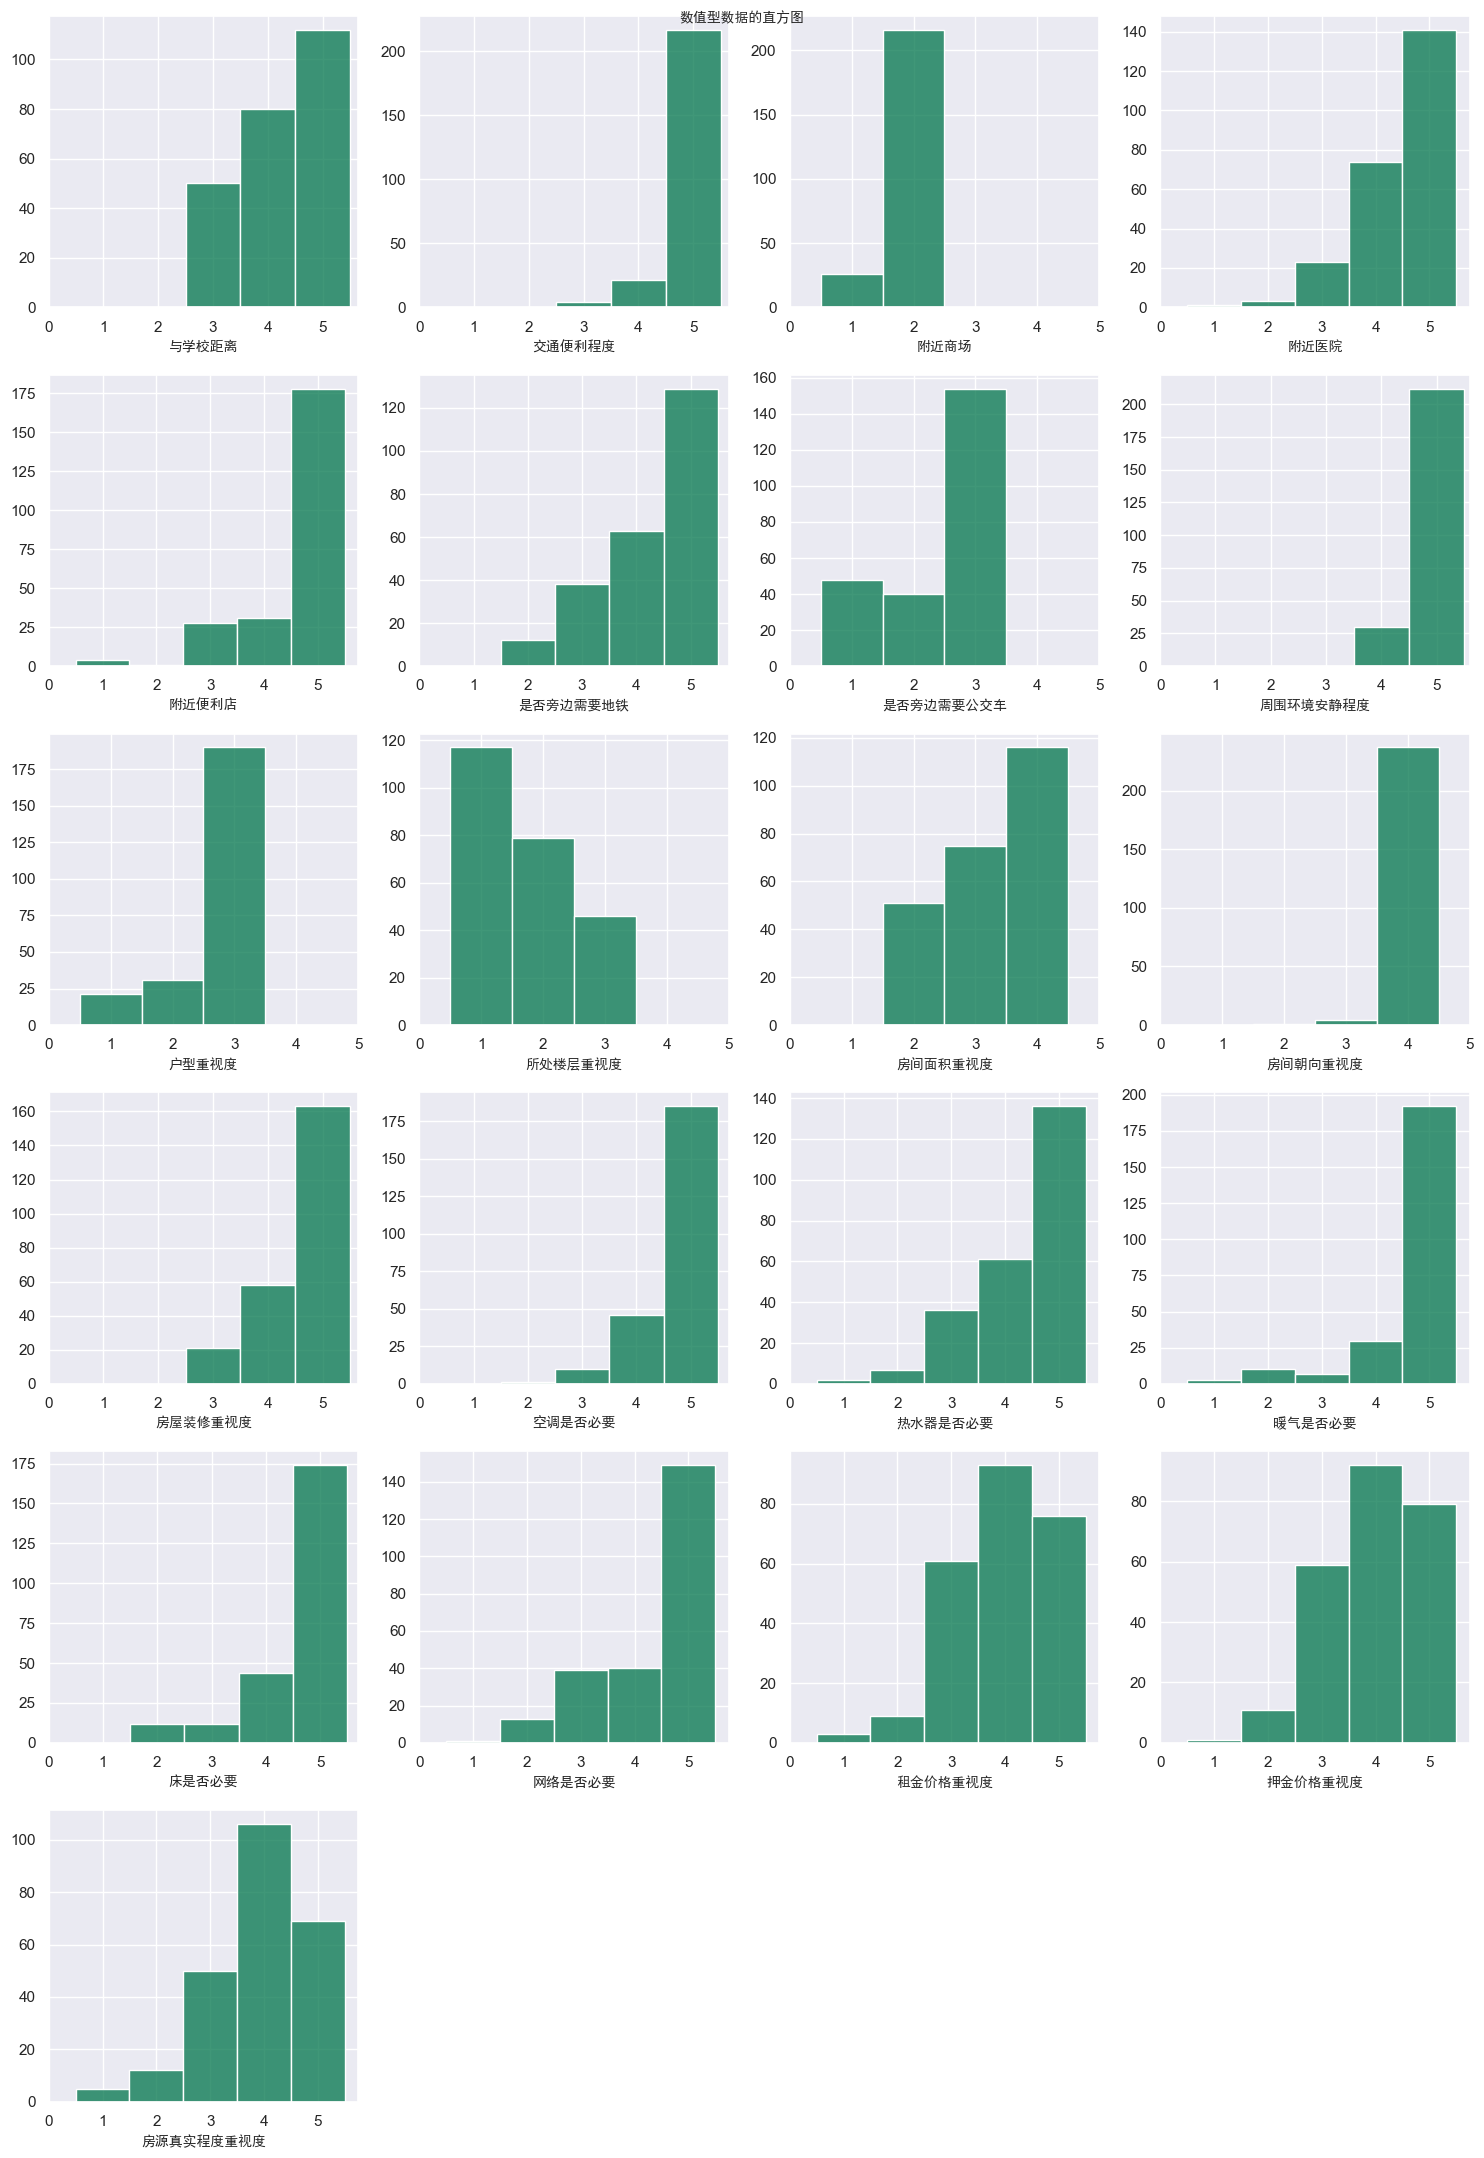

In [6]:
# 数值型数据的直方图
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(15, 22))  # 调整行列数和图的大小
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    sns.histplot(survey[column], bins=[0.5, 1.5, 2.5, 3.5,
                 4.5, 5.5], ax=axes[i], discrete=True, color="#00754B")
    axes[i].set_xlabel(column, fontproperties=SimHei)
    axes[i].set_ylabel('', fontproperties=SimHei)
    axes[i].set_xticks(range(0, 6))
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.savefig("./output/问卷-数值型数据的直方图.png", dpi=600)
fig.suptitle("数值型数据的直方图", fontproperties=SimHei)
plt.tight_layout()
plt.show()

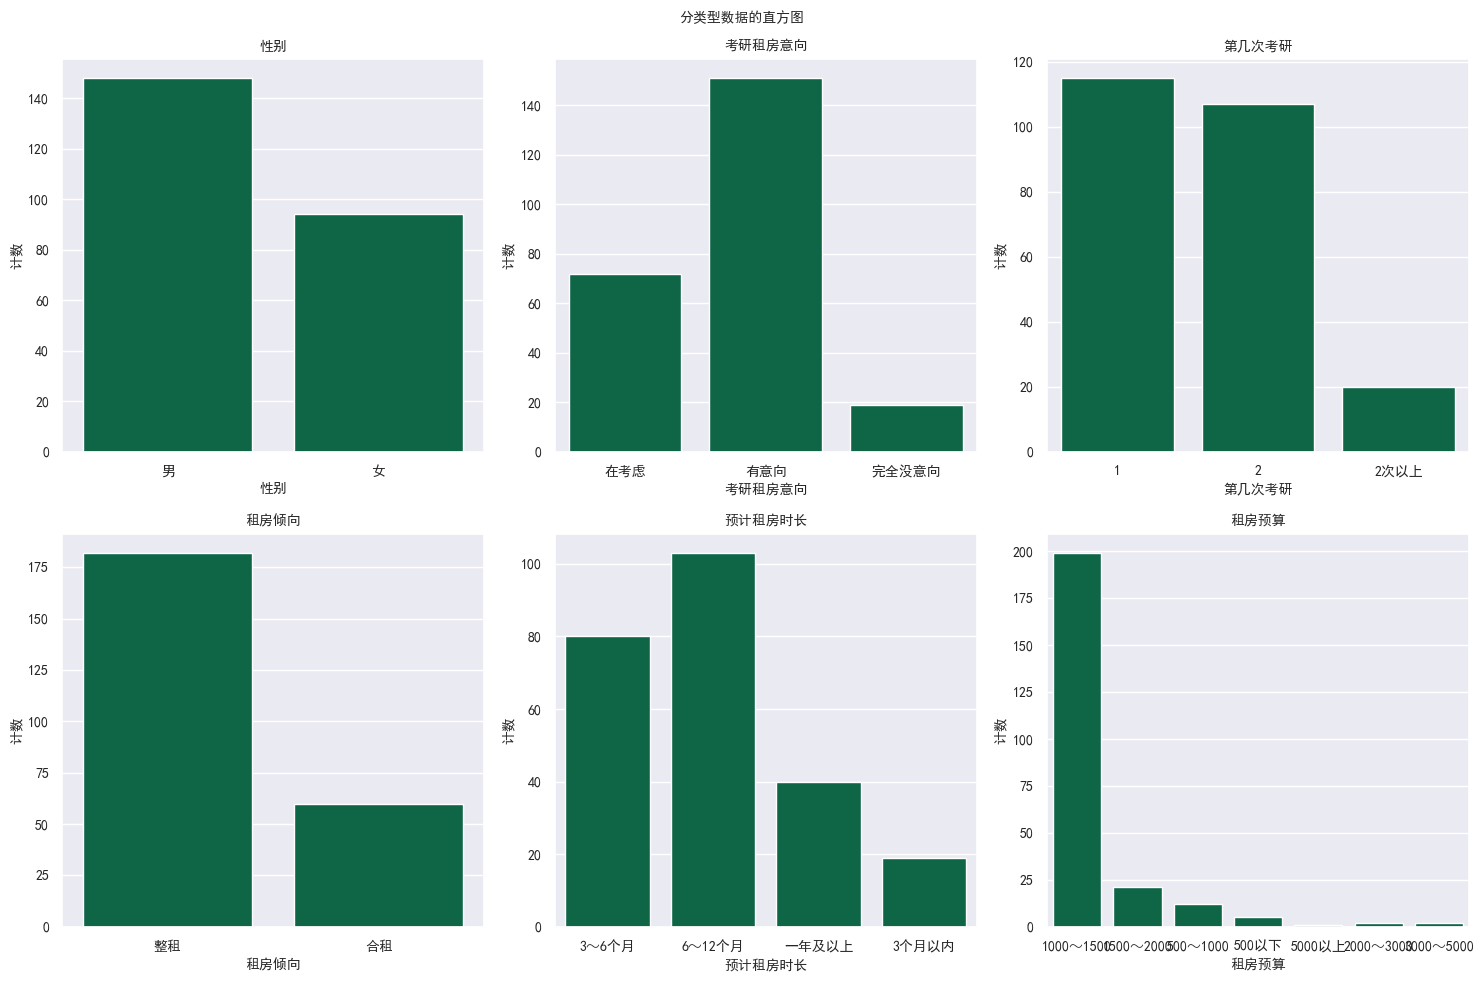

In [7]:
# 分类数据的计数图
categorical_columns = ['性别', '考研租房意向', '第几次考研', '租房倾向', '预计租房时长', '租房预算']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # 调整行列数和图的大小
axes = axes.flatten()
for i, column in enumerate(categorical_columns):
    sns.countplot(x=survey[column], ax=axes[i], color="#00754B")
    axes[i].set_title(column, fontproperties=SimHei)
    axes[i].set_xlabel(column, fontproperties=SimHei)
    axes[i].set_ylabel('计数', fontproperties=SimHei)
    for label in axes[i].get_xticklabels():
        label.set_fontproperties(SimHei)
    for label in axes[i].get_yticklabels():
        label.set_fontproperties(SimHei)
plt.tight_layout()
plt.savefig("./output/问卷-分类型数据的直方图.png", dpi=600)
fig.suptitle("分类型数据的直方图", fontproperties=SimHei)
plt.tight_layout()
plt.show()

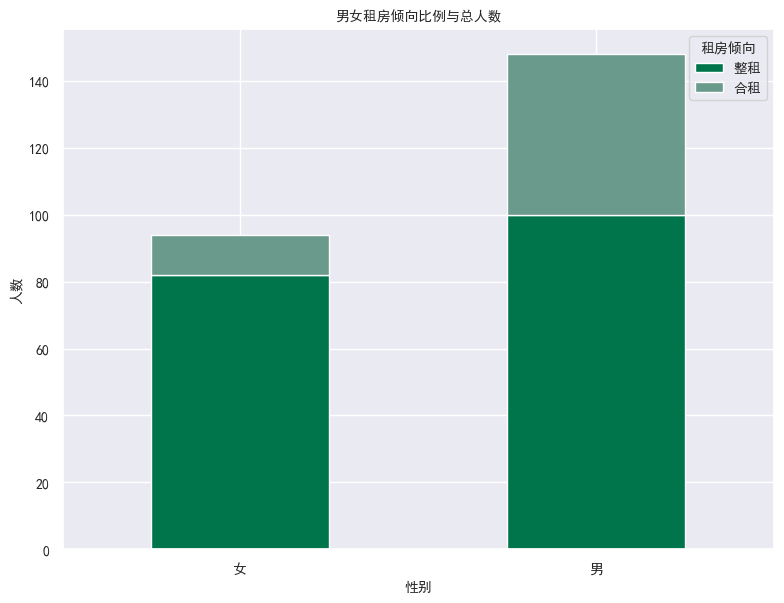

In [8]:
grouped = survey.groupby(['性别', '租房倾向']).size().unstack(fill_value=0)
grouped = grouped[['整租', '合租']]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
grouped.plot(kind='bar', stacked=True, ax=ax, color=[
             '#00754B', '#6A9A8B'])

ax.set_xlabel('性别', fontproperties=SimHei)
ax.set_ylabel('人数', fontproperties=SimHei)
ax.legend(['整租', '合租'], title='租房倾向', prop=SimHei, title_fontproperties=SimHei)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(SimHei)

plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("./output/问卷-男女租房倾向比例与总人数.png", dpi=600)
ax.set_title('男女租房倾向比例与总人数', fontproperties=SimHei)
plt.show()

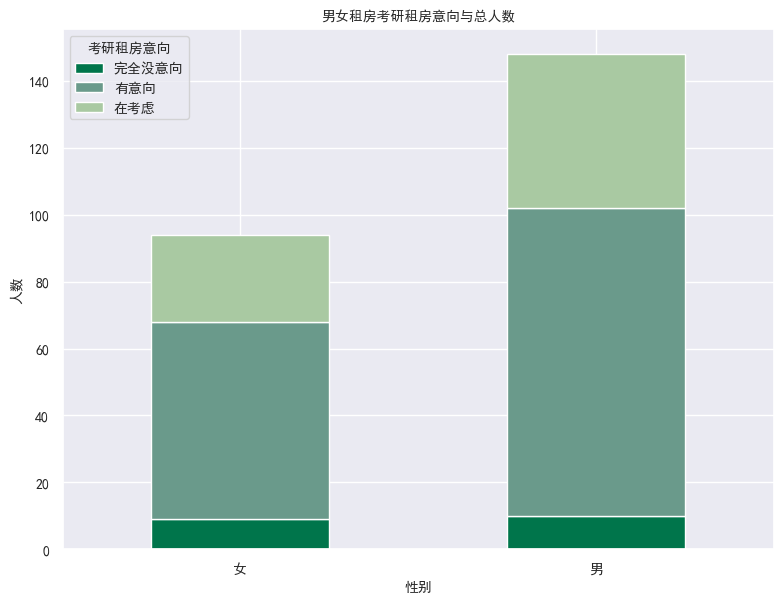

In [9]:
grouped = survey.groupby(['性别', '考研租房意向']).size().unstack(fill_value=0)
grouped = grouped[['完全没意向', '有意向', '在考虑']]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
grouped.plot(kind='bar', stacked=True, ax=ax, color=[
             '#00754B', '#6A9A8B', '#A9C9A2'])

ax.set_xlabel('性别', fontproperties=SimHei)
ax.set_ylabel('人数', fontproperties=SimHei)
ax.legend(['完全没意向', '有意向', '在考虑'], title='考研租房意向',
          prop=SimHei, title_fontproperties=SimHei)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontproperties(SimHei)

plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("./output/问卷-男女考研租房意向比例与总人数.png", dpi=600)
ax.set_title('男女租房考研租房意向与总人数', fontproperties=SimHei)
plt.show()

In [10]:
graduateSituation = pd.read_csv("./input/考研情况.csv", encoding="utf-8")
graduateSituation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   年份      14 non-null     int64  
 1   考研报名人数  14 non-null     int64  
 2   考研招生人数  14 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 468.0 bytes


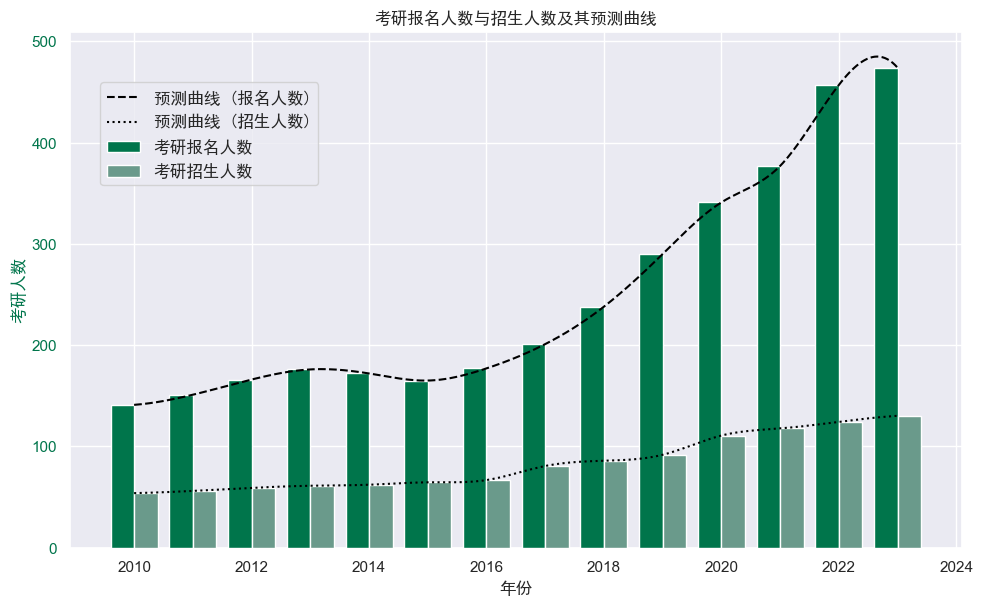

In [11]:
from scipy.interpolate import CubicSpline

# 设置字体为SimHei
SimHei = FontProperties(fname="./input/simhei.ttf")

# 创建图形
fig, ax1 = plt.subplots(figsize=(10, 6))

# 柱状图：考研报名人数
bar_width = 0.4
ax1.bar(graduateSituation['年份'] - bar_width/2, graduateSituation['考研报名人数'],
        width=bar_width, color='#00754B', label='考研报名人数', zorder=5)
ax1.set_xlabel('年份', fontproperties=SimHei)
ax1.set_ylabel('考研人数', fontproperties=SimHei, color='#00754B')
ax1.tick_params(axis='y', labelcolor='#00754B')

# 柱状图：考研招生人数
ax1.bar(graduateSituation['年份'] + bar_width/2, graduateSituation['考研招生人数'],
        width=bar_width, color='#6A9A8B', label='考研招生人数', zorder=5)

# 使用样条差值创建一个预测曲线（报名人数）
cs = CubicSpline(graduateSituation['年份'], graduateSituation['考研报名人数'])
xnew = np.linspace(graduateSituation['年份'].min(
), graduateSituation['年份'].max(), 300)
ynew = cs(xnew)

# 添加预测曲线
ax1.plot(xnew, ynew, color='black',
         label='预测曲线 (报名人数)', linestyle='--', zorder=10)

# 使用样条差值创建一个预测曲线（招生人数）
cs2 = CubicSpline(graduateSituation['年份'], graduateSituation['考研招生人数'])
ynew2 = cs2(xnew)

# 添加预测曲线
ax1.plot(xnew, ynew2, color='black',
         label='预测曲线 (招生人数)', linestyle=':', zorder=10)

# 图例和标题
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), prop=SimHei)

# 显示图形
plt.tight_layout()
plt.savefig("./output/介绍-考研报名人数与招生人数及其预测曲线.png", dpi=600)
plt.title('考研报名人数与招生人数及其预测曲线', fontproperties=SimHei)
plt.show()